# This notebook demonstrates the application of various Machine Learning  algorithm in determining whether a credit card transaction is fraudulent or not.

## About the data
### The dataset used for this notebook  has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

### The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

### It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

## Goal of the case study:
### The case study's main motivation is to use past data on fraudulent transactions to build a model that can detect fraudulent transactions in future transactions. As we all know, numerous fraudulent credit card transactions occur every day, causing harm to both banks and cardholders. As a result, it will be groundbreaking if we can develop an automated system that can detect any fraudulent transaction and trigger the necessary risk mitigation response.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### All columns datatypes are of numeric

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
#Checking for null values in dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Hence, from the above code block result we can say that there are no null or nan values in data

In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

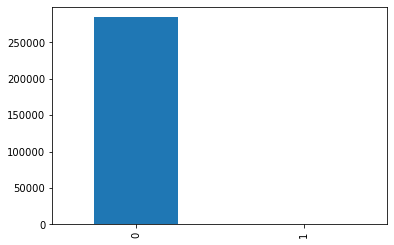

In [7]:
data.Class.value_counts().plot(kind='bar')

### From the above plot we can determine that number of fraudulent transaction is extremely low as compared to genuine transaction, which is actually true reprenstation of real life scenario where fraudulent transaction happens extremely less in comparison to genuine transaction.

In [8]:
print('Percentage of genuine transaction in the data:', (data.Class.value_counts()[0]/len(data.Class)) * 100)
print('Percentage of fraudulent transaction in the data:', (data.Class.value_counts()[1]/len(data.Class)) * 100)

Percentage of genuine transaction in the data: 99.82725143693798
Percentage of fraudulent transaction in the data: 0.1727485630620034


### As per the observation from above results we can say that the data is highly imbalaced where 99.8% of data comes under class 0 i.e. genuine transaction.Hence in this case using accuracy as perfomance metrics will be not wise because our aim here is to predict fraudulent transaction.Instead we will be using recall as our performance metrics.

## Before applying ML algorithms lets dig deeper into the provided data. Hence we will be doing EDA

In [9]:
# Dropping the time column and normalizing the amount column
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475


array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

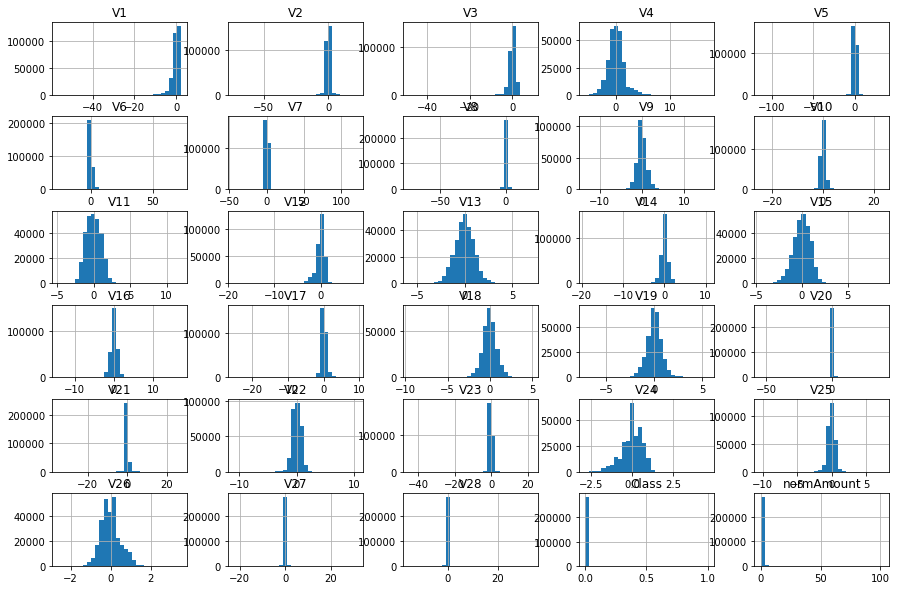

In [10]:
data.hist(bins=30, figsize=(15, 10))

### Above plot suggest that distribution of few columns is Gausian however there few columns with data either right skewed or left skewed.

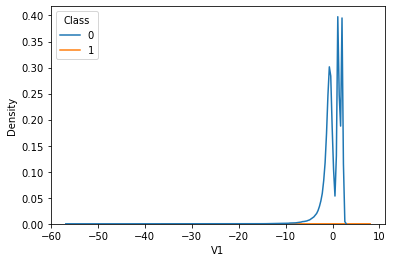

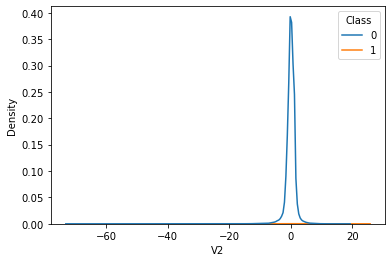

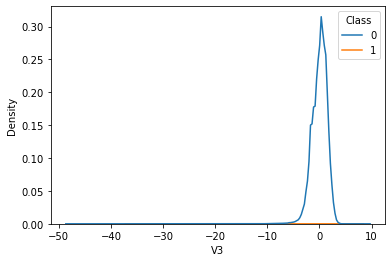

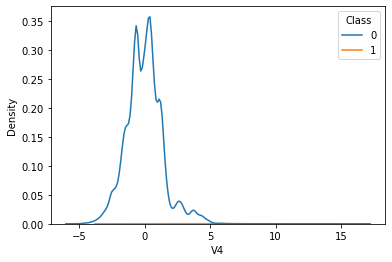

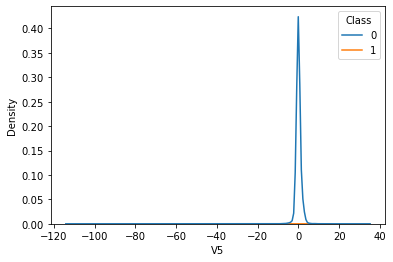

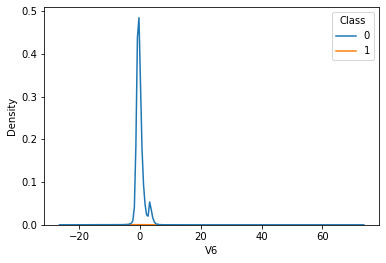

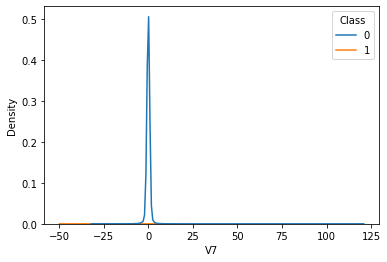

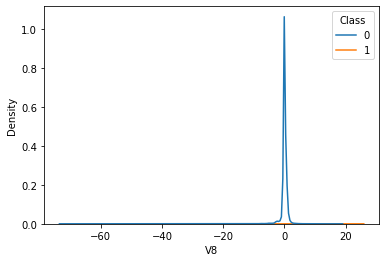

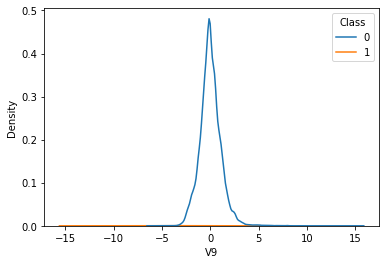

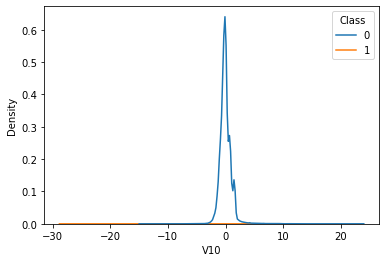

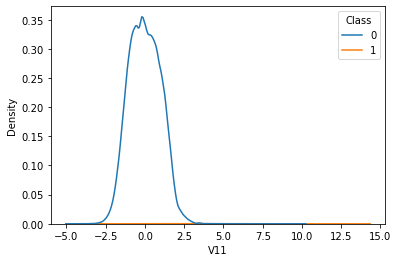

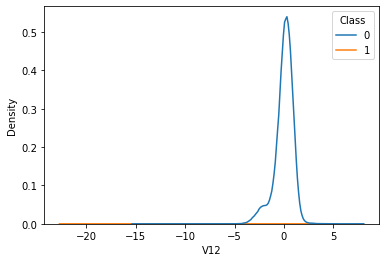

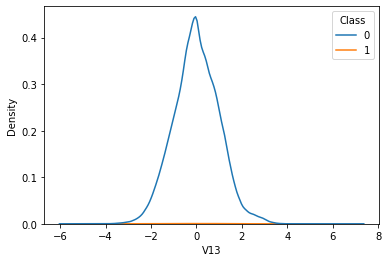

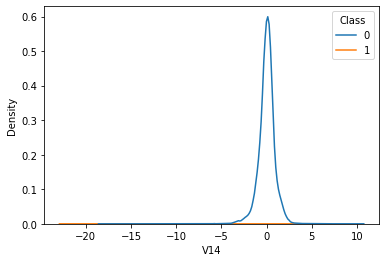

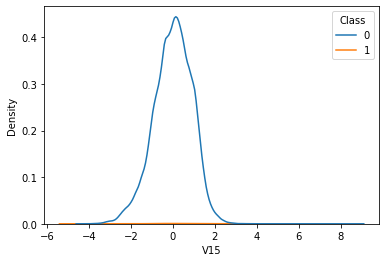

In [11]:
for cols in list(data.columns)[0:15]:
    sns.kdeplot(data=data, x=data[cols], hue=data['Class'])
    plt.show()

### Above kde plot indicates that feature V7, V8, V9, V10, V11, V12 and V14 has some seperation between the class.Hence these features are important in separating and predicting the farudulent transaction.

In [13]:
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
V1,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.101347,-0.227709
V2,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.091289,-0.531409
V3,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.192961,-0.210880
V4,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.133447,0.098732
V5,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.094974,-0.386356
V6,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.043643,0.215981
V7,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.187257,0.397311
V8,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.019875,-0.103079
V9,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.097733,-0.044246
V10,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.216883,-0.101502


### In order to dealing with imbalance of data, upsampling strategy will be employed,we will not do downsampling because the minority class has extremely less data i.e arround 500 and there is always is the possibility of information loss in case of downsampling.

In [14]:
# before upsampling the data we need to split the data into train and test set to avoid data leakage in test data and consequently
# to avoid overfitting
data_x = data.drop(['Class'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data['Class'], test_size=0.23, random_state=42)

In [15]:
y_test.value_counts() # to check the count of of minority class in our test

0    65396
1      110
Name: Class, dtype: int64

In [16]:
#concating train X and y data before doing the upsampling of train data

data_train = pd.concat([X_train, y_train], axis=1)

In [17]:
from sklearn.utils import resample

data_majority = data_train[data_train.Class==0]
data_minority = data_train[data_train.Class == 1]

data_minority_upsampled = resample(data_minority,
                                  replace=True,
                                  n_samples=len(data_majority),
                                  random_state=123)

# Combinining majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

data_upsampled.Class.value_counts()

0    218919
1    218919
Name: Class, dtype: int64

In [18]:
# Now separating the predictor data and target data of upsampled training data
data_upsampled_X_train = data_upsampled.drop(['Class'], axis=1)
data_upsampled_y_train = data_upsampled['Class']

In [19]:
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.pipeline import Pipeline

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_rand_int

In [21]:

from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [26]:
def plot_auprCurve(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
lg1 = LogisticRegression(random_state=13, max_iter = 1000)
lg1.fit(data_upsampled_X_train, data_upsampled_y_train)

LogisticRegression(max_iter=1000, random_state=13)

In [28]:
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') 
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9760785271578176
Confusion Matrix: 
[[63838  1558]
 [    9   101]]
Area Under Curve: 0.947178865540845
Recall score: 0.9181818181818182


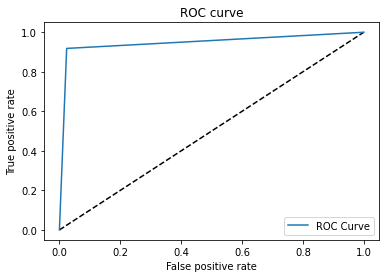

In [29]:
plot_auprCurve(y_test,y_pred)

### From above result we can deduce that after upsampling the data our simple logistic regression model has given the recall score of 91% which is very good. We had total of 110 fraudulaent transactions in our test data and our model has predicited 101 transaction as fraudulent correctly out of 110 fraudulent transaction.

In [30]:
# Now we will test the score with random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, verbose=1,oob_score=True,
                           max_depth = 15,
                           max_features = 'sqrt',
                           n_estimators = 500,
                           min_samples_split=5)

rf.fit(data_upsampled_X_train, data_upsampled_y_train)
y_pred = rf.predict(X_test)
# performance metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') 
print(f'Recall score: {recall_score(y_test,y_pred)}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.4s finished


Accuracy Score: 0.9994962293530364
Confusion Matrix: 
[[65384    12]
 [   21    89]]
Area Under Curve: 0.9044537058146452
Recall score: 0.8090909090909091


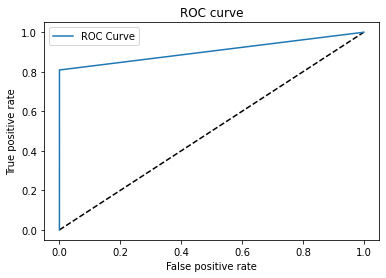

In [31]:
plot_auprCurve(y_test,y_pred)

In [32]:
#! pip install xgboost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_clf.fit(data_upsampled_X_train, data_upsampled_y_train)
y_pred = xgb_clf.predict(X_test)
# performance metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') 
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.99957255823894
Confusion Matrix: 
[[65388     8]
 [   20    90]]
Area Under Curve: 0.9090297432703697
Recall score: 0.8181818181818182


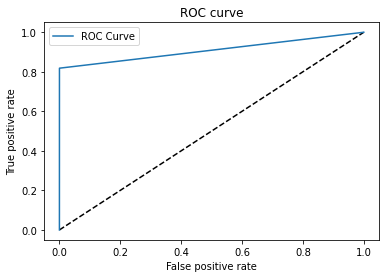

In [33]:
plot_auprCurve(y_test,y_pred)

# Final observation and report:
### The data used in the case study was highly imbalanced
### The goal of the case study was to correctly predicting fraudulent transaction, hence use of accuracy as performance metrics will not work for our case as  the data was extremely imbalance, because even the dumb model could have achieved high accuracy but would have failed to classify fraud transaction with high precison. Hence, Recall as the performace metrics was choosen for measuring the efficacy of model.
### To tackle the imbalance data problem, upsampling method was employed, in this case study downsampling method was not used because of the extreme low presence of minorty class and to avoid information loss.
### Three machine learning models were trained and tested to predict the fraudulent transaction.
### Logistic Regression gave the best recall score of 91 % which is extremely good considering that logistic regression is one of the simplest linear model and has less training time.
### Both Random Forest and XG boost with default parametrs had comparitely low recall score, this might be due to absence of hypertuned parametrs usage while training the model.
### The reason behind not using hypertuning of RandomForest and XGBoost was extreme high hypertuning time taken by both local and Google colab, but we are sure if hypertuned enseble model would have been used we might have seen the improvement in recall score from 91%.

# Conclusion
### The solution provided in the case study worked sucessfully, in the test data we had 110 fraudlent transaction and our best model able to predict 101 of the fraud transaction correctly, which really shows the robustness of the model.

# Future Scope
### The model recall score could be improved by using Deep Learning methods. Also the model performance can be improved by training the model with sysnthetic generated data by  CTGAN.